## Agrupación desde Machine Learning

Algoritmos de agrupación

A lo largo de la lectura estudiamos la reducción de dimensionalidad como un método de
aprendizaje no supervisado: tenemos una matriz de datos y nosotros tenemos poca
información sobre cómo se comportan las dimensiones latentes.

El otro método de aprendizaje es la agrupación (o clustering en la jerga inglesa). La tarea
principal de los algoritmos de agrupación es dividir los datos en una serie de grupos en
base a alguna medida de similitud entre los puntos. Si bien la agrupación busca asignar
etiquetas de similar manera que las estrategias de clasificación, en los métodos de
agrupación no tenemos certeza sobre la cantidad de grupos emergentes.

Implementar algoritmos de agrupación dentro del flujo de análisis facilita la representación
de la estructura de los datos así como el descubrimiento de nuevos patrones.

### KMeans

La idea de kMeans es desarrollar una segmentación de vectores en un espacio
d-dimensional de manera tal de inferir grupos que no se sobrepongan. El método clásico
para obtener una serie de clusters se basa en:

1. Asignar una cantidad k de clusters: Por lo general el investigador debe probar con distintos valores de k.

2. Asignar a cada observación en el espacio al cluster más cercano: Los clusters se
generan a partir de la media aritmética de todos los puntos cercanos al cluster.

3. Por cada cluster, actualizar su centroide como la media para todos sus puntos
asignados.

4. Iterar los puntos 2 y 3 hasta que se satisfaga algún criterio.

### Implementación

Para demostrar la aplicación de kMeans generaremos un caso artificial con make_blobs,
que permite generar "grupos de datos siguiendo una función Gausiana Isotrópica". Por
Gausiana entendemos una distribución normal, y por Isotrópica entendemos una
distribución normal donde la matriz de covarianza se simplifica a la matriz de identidad

$\sum = o^2I$

La función make_blobs se encuentra en el módulo datasets de la librería sklearn. La
función necesita de la cantidad de casos a simular en total definidos en n_clusters, así
como los parámetros media (centers) y varianza (cluster_std). En este caso generamos
un array de arrays donde definimos las coordenadas de cada blob a generar, así como un
array que contiene la varianza asociada a cada blob. Como con toda simulación, es
necesario definir una semilla pseudoaleatoria para asegurar replicabilidad de los resultados.

make_blobs retornará las coordenadas para cada punto en el objeto X_mat y la pertenencia
de cada punto a alguna agrupación.

Para este caso estamos simulando 3000 casos repartidos en 7 grupos.


In [16]:
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
import lec7_graphs as gfx
from sklearn.cluster import KMeans

In [17]:
# Definimos los centros
bivariate_mu_params = list([[ 0.2, 2.3], [-1.5 , 2.3],
                        [-2.8, 1.8], [-1.8, 2.8],
                        [-.8, 1.3], [.3, 2.1], [.4, 3]])

In [18]:
# Definimos las varianzas
bivariate_sigma_params = list([0.1, 0.1, 0.1, 0.1, 0.1, .1, .1])

In [19]:
X_mat, y_vec = make_blobs(n_samples=3000, centers=bivariate_mu_params, cluster_std=bivariate_sigma_params, random_state = 15820)

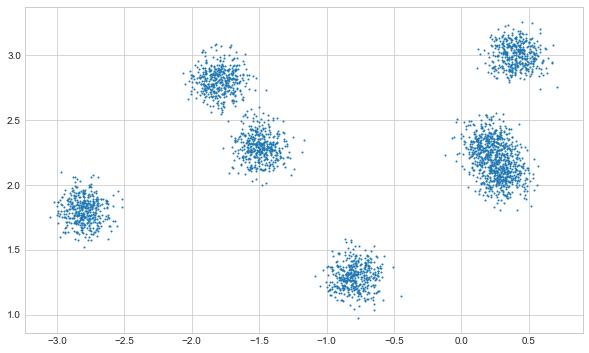

In [20]:
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=1)

Para implementar KMeans, lo importamos desde el módulo cluster de la librería sklearn.
La forma más fácil de instanciar una clase KMeans, asignamos la cantidad de grupos a
identificar (que se declara en n_clusters) y una semilla pseudoaleatoria para replicabilidad
(declarada con random_state).

Existen más especificaciones en esta etapa como n_init que define la cantidad de veces
que el algoritmo será iniciado con distintos centroides, así como max_iter que define la
cantidad máxima de iteraciones en una etapa.


In [21]:
kmeans = KMeans(n_clusters = 7, random_state = 15820)

# obtenemos los resultados
fit_results = kmeans.fit_predict(X_mat)

In [22]:
kmeans.labels_

array([2, 5, 3, ..., 4, 3, 0])

In [23]:
pd.Series(kmeans.labels_).value_counts('%')

2    0.143333
0    0.143000
6    0.143000
5    0.142667
3    0.142667
4    0.142667
1    0.142667
dtype: float64

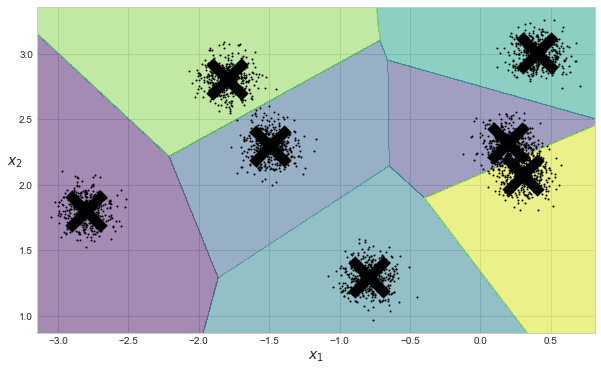

In [24]:
gfx.plot_decision_boundaries(kmeans, X_mat)

### Inercia del modelo

Si bien no podemos medir el desempeño del modelo (porque no tenemos etiquetas previas),
podemos medir la distancia promedio entre cada número y su centroide mediante la inercia,
entendida como la suma de distancias cuadráticas. Esto lo logramos mediante la métrica de
inercia.

Podemos obtener la inercia de un modelo creado con KMeans al solicitar .inertia_. En este
caso la inercia asociada al modelo cuando estimamos 7 clusters es de 56.


In [25]:
kmeans.inertia_

56.36971803873414

Cuál es el resultado esperado respecto a la inercia de un modelo? Buscamos aquél que
presente una reducción substancial de las distancias cuadráticas entre los puntos y sus
centroides. Así, estamos frente a una estrategia de minimización de pérdidas.

De manera similar al promedio del error cuadrático en los modelos lineales, la inercia sólo
tiene sentido en la medida que comparamos entre múltiples candidatos. Para ello vamos a
estimar la inercia cuando aumentamos la cantidad de clusters de 1 a 10 en pasos de a 1.
Compararemos la inercia de cada modelo candidato mediante un gráfico.

In [26]:
# generamos un array para guardar los resultados.
inertia = []
# Para cada número entre 1 y 10
for i in range(1, 11):
        # Agregamos la inercia
        inertia.append(KMeans(n_clusters = i, random_state = 15820).fit(X_mat).inertia_)


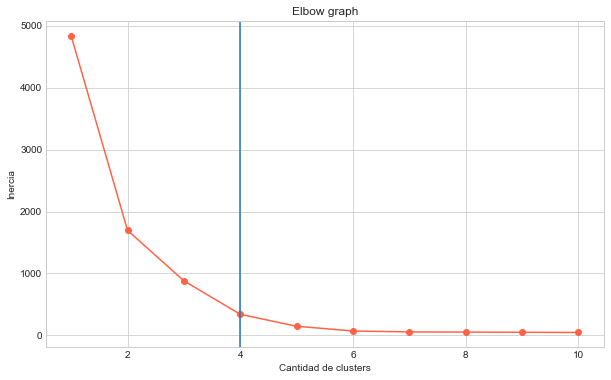

In [27]:
# graficamos el resultado
plt.plot(range(1, 11), inertia, 'o-', color = 'tomato')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercia')
plt.title('Elbow graph')
plt.axvline(4)

Una estrategia ineficiente es escoger el modelo candidato que minimice la inercia sin tener
en consideración el resto de los modelos, dado que siempre tenderá a minimizarse en la medida que aumentamos la cantidad de grupos. Mediante el gráfico podemos encontrar un
punto de inflexión que generalmente se encuentra antes de que la inercia se estabilice. El
gráfico sugiere que un modelo que agrupe los datos entre 4 grupos minimiza la distancia
entre los puntos y sus centroides.



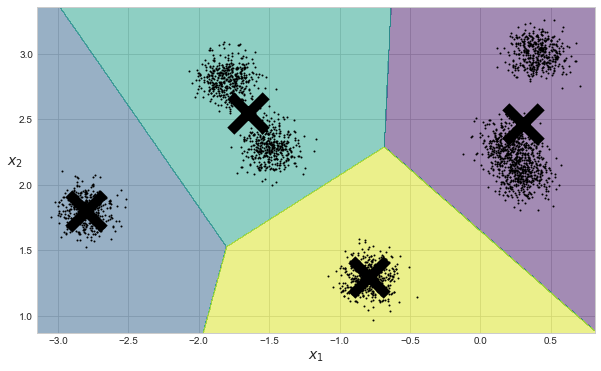

In [28]:
kmeans = KMeans(n_clusters = 4, random_state = 15820)
fit_results = kmeans.fit_predict(X_mat)
gfx.plot_decision_boundaries(kmeans, X_mat)

### Variabilidad del algoritmo de agrupación

En la variante más simple del algoritmo KMeans los centroides se inicializan de forma
aleatoria, y éste busca mejorar de forma gradual la posición de los centroides.

Un problema substancial de esto es que se pueden llegar a soluciones distintas
dependiendo de la semilla pseudoaleatoria.

En el siguiente ejemplo graficamos dos soluciones para un modelo con 7 grupos, donde sólo
varían random_state.

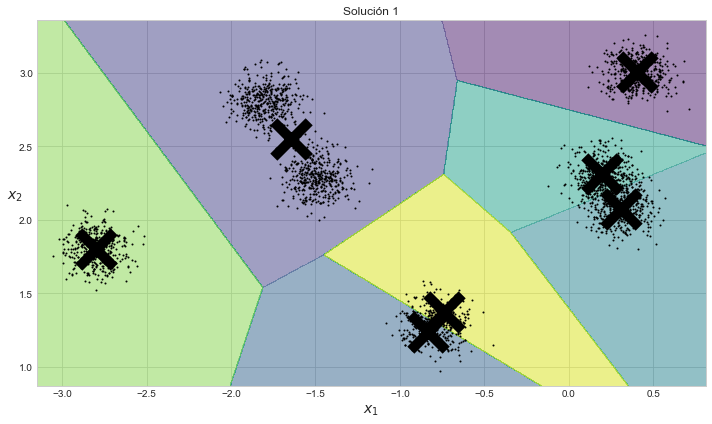

In [36]:
init_1 = KMeans(n_clusters=7, random_state = 15820, init="random", n_init = 1)
init_1.fit(X_mat)
init_2 = KMeans(n_clusters=7, random_state = 158, init="random", n_init = 1)
init_2.fit(X_mat)

gfx.plot_decision_boundaries(init_1, X_mat)
plt.title('Solución 1')
plt.tight_layout()

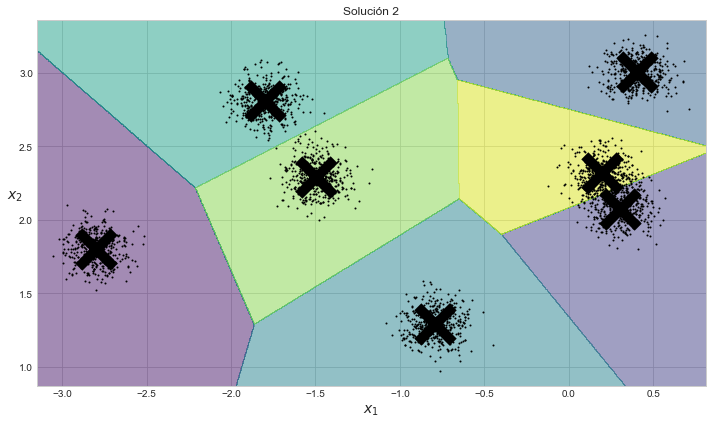

In [30]:
plt.title('Solución 2')
gfx.plot_decision_boundaries(init_2, X_mat)
plt.tight_layout()

In [ ]:
init_3 = KMeans(n_clusters=7, random_state = 15820, init="random", n_init = 100)
init_3.fit(X_mat)
init_4 = KMeans(n_clusters=7, random_state = 158, init="random", n_init = 10)
init_4.fit(X_mat)

gfx.plot_decision_boundaries(init_3, X_mat)
plt.title('Solución 1')
plt.tight_layout()

In [ ]:
plt.title('Solución 2')
gfx.plot_decision_boundaries(init_2, X_mat)
plt.tight_layout()

#### Referencias
* Donoho, David. 2000. High-Dimensional Data Analysis: the Curses and Blessings of Dimensionality.
* Bellman, Richard. 1961. Adaptative Control Processes: A guided tour. Princeton University Press.
* Revelle, William. 2017. Psychometric Theory.
  * Ch6: Construct, Components and Factor Models.
* Bartholomew, D; Steele, F; Moustaki; Galbraith, J. 2008. Analysis of Multivariate Social Science Data:
  * Ch2: Cluster Analysis.
  * Ch5: Principal Components Analysis.
  * Ch7: Factor Analysis.
* Wansbeek, T; Meijer, E. 2000. Measurement Error and Latent Variables in Econometrics:
  * Ch7: Factor analysis and related methods.
